In [21]:
import pandas as pd
from pathlib import Path
#import pyarrow.parquet as pq

train_path = Path(Path.cwd(), 'Data', 'train_series.parquet')
train_path

WindowsPath('g:/Mi unidad/Personal/IMT/3A/Advanced Machine Learning/Project_Sleep_States/Data/train_series.parquet')

In [22]:
# table = pq.read_table(path)
# train_series = table.to_pandas()  # Convert to Pandas DataFrame if needed
train_series = pd.read_parquet(train_path)
print(train_series.head())

      series_id  step                 timestamp  anglez    enmo
0  038441c925bb     0  2018-08-14T15:30:00-0400  2.6367  0.0217
1  038441c925bb     1  2018-08-14T15:30:05-0400  2.6368  0.0215
2  038441c925bb     2  2018-08-14T15:30:10-0400  2.6370  0.0216
3  038441c925bb     3  2018-08-14T15:30:15-0400  2.6368  0.0213
4  038441c925bb     4  2018-08-14T15:30:20-0400  2.6368  0.0215


In [23]:
train_path = Path(Path.cwd(), 'Data', 'train_events.csv')
train_events = pd.read_csv(train_path)

In [ ]:
print(train_series.info())
print(train_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
dtypes: float32(2), object(2), uint32(1)
memory usage: 3.3+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  14508 non-null  object 
 1   night      14508 non-null  int64  
 2   event      14508 non-null  object 
 3   step       9585 non-null   float64
 4   timestamp  9585 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 566.8+ KB
None


: 

In [ ]:
train_events

In [ ]:
train_series

In [5]:
train_series = train_series[:10000]
train_events = train_events[:10000]

In [ ]:
train_series

In [17]:
train_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
9995,c107b5789660,35,wakeup,NaN,NaN
9996,c107b5789660,36,onset,NaN,NaN
9997,c107b5789660,36,wakeup,NaN,NaN
9998,c107b5789660,37,onset,NaN,NaN


In [ ]:
df = train_series.merge(train_events, on="series_id", how="left")
df

In [ ]:
df = df.dropna(subset=["step_y"])
df = df.drop(columns=["night", "timestamp_x", "timestamp_y"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[["anglez", "enmo"]]
y = df["event"]

# Convertir "onset" y "wakeup" a valores numéricos (0 y 1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inicializar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39     37927
           1       0.38      0.37      0.38     38073

    accuracy                           0.38     76000
   macro avg       0.38      0.38      0.38     76000
weighted avg       0.38      0.38      0.38     76000



In [12]:
test_path = Path(Path.cwd(), 'Data', 'test_series.parquet')
test_series = pd.read_parquet(test_path)
X_test = test_series[["anglez", "enmo"]]

# Hacer predicciones
test_series["event_pred"] = clf.predict(X_test)
test_series["score"] = clf.predict_proba(X_test)[:, 1]  # Probabilidad de evento

# Convertir números a nombres de eventos
test_series["event"] = encoder.inverse_transform(test_series["event_pred"])

In [13]:
test_series.sort_values(by="score", ascending=False).head(20)

,series_id,step,timestamp,anglez,enmo,event_pred,score,event
40,038441c925bb,40,2018-08-14T15:33:20-0400,-79.996101,0.0135,1,0.623922,wakeup
53,038441c925bb,53,2018-08-14T15:34:25-0400,-80.014702,0.0137,1,0.611662,wakeup
330,0402a003dae9,30,2018-12-18T12:47:30-0500,-9.026300,0.0460,1,0.591007,wakeup
47,038441c925bb,47,2018-08-14T15:33:55-0400,-80.008202,0.0140,1,0.586525,wakeup
95,038441c925bb,95,2018-08-14T15:37:55-0400,-80.013603,0.0128,1,0.584171,wakeup
7,038441c925bb,7,2018-08-14T15:30:35-0400,2.636700,0.0218,1,0.581440,wakeup
79,038441c925bb,79,2018-08-14T15:36:35-0400,-79.977898,0.0133,1,0.577322,wakeup
145,038441c925bb,145,2018-08-14T15:42:05-0400,-79.990601,0.0135,1,0.576564,wakeup
416,0402a003dae9,116,2018-12-18T12:54:40-0500,-54.837002,0.0353,1,0.575557,wakeup
128,038441c925bb,128,2018-08-14T15:40:40-0400,-80.199600,0.0127,1,0.566737,wakeup


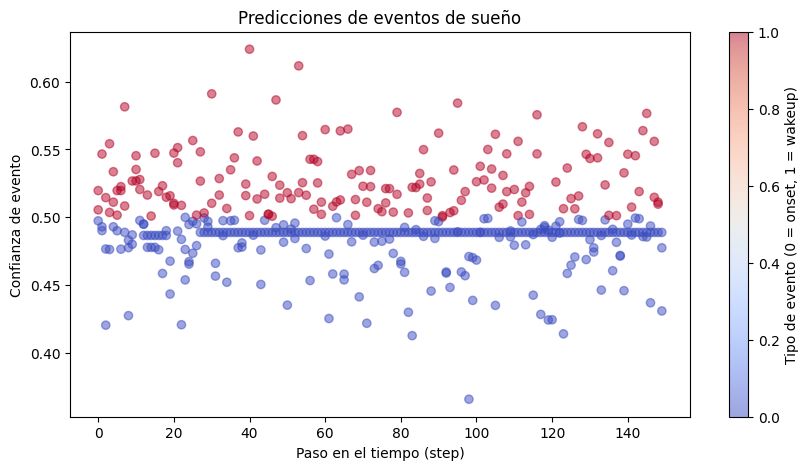

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(test_series["step"], test_series["score"], c=test_series["event_pred"], cmap="coolwarm", alpha=0.5)
plt.xlabel("Paso en el tiempo (step)")
plt.ylabel("Confianza de evento")
plt.title("Predicciones de eventos de sueño")
plt.colorbar(label="Tipo de evento (0 = onset, 1 = wakeup)")
plt.show()

### **Feature engineering**

In [ ]:
print(train_series.columns)

Index(['series_id', 'step', 'timestamp', 'anglez', 'enmo', 'anglez_diff',
       'enmo_diff', 'anglez_rolling_mean', 'enmo_rolling_mean',
       'anglez_rolling_std', 'enmo_rolling_std'],
      dtype='object')


In [15]:
# Crear nuevas features
def feature_engineering(df):
    df["anglez_diff"] = df["anglez"].diff()  # Diferencia entre valores consecutivos
    df["enmo_diff"] = df["enmo"].diff()

    df["anglez_rolling_mean"] = df["anglez"].rolling(window=10, min_periods=1).mean()
    df["enmo_rolling_mean"] = df["enmo"].rolling(window=10, min_periods=1).mean()

    df["anglez_rolling_std"] = df["anglez"].rolling(window=10, min_periods=1).std()
    df["enmo_rolling_std"] = df["enmo"].rolling(window=10, min_periods=1).std()

    df.fillna(0, inplace=True)  # Reemplazar NaN por 0
    return df

# Aplicar feature engineering al train y test
train_series = feature_engineering(train_series)
test_series = feature_engineering(test_series)

# Seleccionar nuevas features
feature_cols = ["anglez", "enmo", "anglez_diff", "enmo_diff", "anglez_rolling_mean", "enmo_rolling_mean",
                "anglez_rolling_std", "enmo_rolling_std"]

X_train = train_series[feature_cols]
y_train = train_series["event"]  # Asegúrate de que esté codificado numéricamente

X_test = test_series[feature_cols]

KeyError: 'event'

### **Submission**

In [ ]:
# Crear archivo de envío
submission = test_series[["series_id", "step_x", "event", "score"]].rename(columns={"step_x": "step"})
submission.insert(0, "row_id", range(len(submission)))

# Guardar CSV
submission.to_csv("submission.csv", index=False)
print("¡Archivo submission.csv guardado!")